**Simple reflex agents** - Project

These agents select actions on the basis of the **current** percept, ignoring the rest of the percept history

In [ ]:
def SimpleReflexAgentProgram(rules, interpret_input):
    #This AP takes action based solely on the percept.

    def program(percept):
        state = interpret_input(percept)
        rule = rule_match(state, rules)
        action = rule.action
        return action

    return program

In [ ]:
def rule_match(state, rules):
    """Find the first rule that matches state."""
    for rule in rules:
        if rule.matches(state):
            return rule

In [ ]:
'''
rules={((0, 0), 'Dirty'): 'Suck',
        (((1, 0), 'Dirty'): 'Suck',
        (((0, 0), 'Clean'): 'Right',
        (((1, 0), 'Clean'): 'Left',
        }


        if status == 'Dirty':
            return 'Suck'
        elif location == loc_A:
            return 'Right'
        elif location == loc_B:
            return 'Left'

--> not optimal to embed logic (rules) in the AgentProgram
'''

def interpret_input(percept):
  loc, status = percept
  return status


def rule_match(state, rules):
  for key in rules:
    if state in key:
      return rules[key]




In [1]:
import os
import sys
import random

In [2]:
%load_ext autoreload
#Now, you can turn on auto-reloading
%autoreload 2

from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/MyDrive/Colab_Notebooks/cs3220_A2_p3' #@param {type: "string"}


Mounted at /content/drive


In [ ]:
!pwd

/content/drive/My Drive/Colab_Notebooks/cs3220_A2_p3/A2_project/src


In [ ]:
prj_folder="A2_project"#@param {type: "string"}
sys.path.append(os.path.join(path, "A2_project", "src"))

In [ ]:
from locations import *

There is an office building with 4 rooms.
The delivery agent moves from one room to another and gives the package according to the type of recipient in the room.
The recipients are:
* an office manager - waiting for daily mail
* an IT specialist - ordered donuts from Tim Hortons
* a Student - ordered a pizza from Domino Pizza

The initial distribution recipients among 4 rooms is random and unknown to the Agent.

However, the Agent can perceive its location (what room is current) and all recipients in the room.

The Agent Program is able to recognize the type of recipient based on the Agent's percepts (one recipient per step).

The Agent gives the suitable package to the recipient.

If all recipients in the room have already received their packages (or nobody in the room) the Agent moves to the next room.

When the last room has been checked the Agent stops.
The initial position of the Agent is random.

In [ ]:
locations=loc_A, loc_B, loc_C, loc_D
locations

((0, 0), (1, 0), (1, 0), (1, 1))

In [ ]:
a=loc_B
a

(1, 0)

In [ ]:
(1,0) in locations

True

In [ ]:
locations.index(a)

1

In [ ]:
locations[locations.index(a)+1]

(1, 0)

In [ ]:
from agents import ReflexAgentA2pro

In [ ]:
from agents import Student, ITStuff,OfficeManager

In [ ]:
s=Student()
i=ITStuff()
o=OfficeManager()

In [ ]:
raA2pro1=ReflexAgentA2pro()

In [ ]:
loc_D

(1, 1)

In [ ]:
testPercept=(loc_A,[s,o,i])
testPercept
raA2pro1.program(testPercept)

'Give pizza'

In [ ]:
from companyEnvClass import *

In [ ]:
ce=CompanyEnvironment()

In [ ]:
ce.add_thing(raA2pro1)

Welcome!
The item is starting in random location...


In [ ]:
ce.agents

[<Agent>]

In [ ]:
print("State of the Environment: {}.".format(ce.locations))
print("Agent is located at {}.".format(raA2pro1.location))

State of the Environment: [(0, 0), (1, 0), (1, 0), (1, 1)].
Agent is located at (1, 1).


In [ ]:
ce.add_thing(i)

The item is starting in random location...


In [ ]:
ce.things

[<ITStuff>]

In [ ]:
print("IT is located at {}.".format(i.location))

IT is located at (1, 1).


In [ ]:
ce.step()

Agent percepted ((1, 1), [<ITStuff>]).
Agent decided to do Give donuts.
The Agent decided to Give donuts to <ITStuff> at location: (1, 1)


In [ ]:
ce.step()

Last room
Agent percepted ((1, 1), []).
Agent decided to do Stop.


In [ ]:
ce.step()

There is no one here who could work...


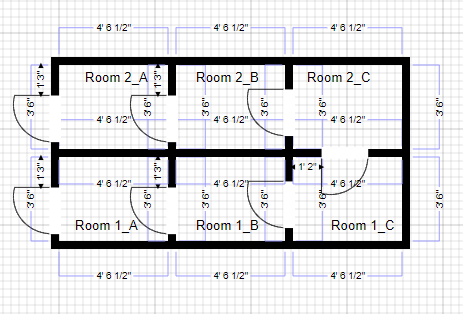

Design and implement the Delivery Agent for the Environment according to the plan above.

The Agent can be placed in any room randomly.

There are 10 people in the building (the number of each type of recipient is randomly generated, as are their places in the building).

The agent can recognise the location and there is a set of rules for movement.
The agent can move forward, turn right/left.
Initially the agent position is ready to go forward (-->).

Determine the case when the agent should stop (remember that the agent has no memory).

The agent's performance changes as follows:
Each move (or turn): -1
Give a package: -3
Initially the agent's performance is 40 (30 for packages, 5 for movement, 5 - extra)